# PRÁCTICA 6: MACHINE LEARNING

## Laura Gómez Bodego 
## Sergio Baña Marchante

## Ejercicio 2: visualización de los datos

In [1]:
#!pip install skl2onnx
#!pip install onnx2json
import Utils as utils
import numpy as np
import pandas

In [2]:
stats = pandas.read_csv('datos/FinalKart.csv')

Datos recogidos sin limpiar

In [3]:
display(stats[200:220])

,ray1,ray2,ray3,ray4,ray5,kartx,karty,kartz,time,action
200,-1.0,7.556266,6.133768,5.391789,3.074126,7.640449,0.279173,-37.94368,20.10069,LEFT_ACCELERATE
201,-1.0,7.150291,6.102683,7.112012,3.157929,8.907069,0.279163,-36.99217,20.20706,LEFT_ACCELERATE
202,-1.0,6.769619,5.964689,-1.000000,3.371314,10.045940,0.279163,-36.11411,20.30363,LEFT_ACCELERATE
203,-1.0,6.540654,5.757755,-1.000000,3.581694,11.176050,0.279176,-35.07482,20.40690,LEFT_ACCELERATE
204,-1.0,6.578003,5.603823,8.856555,3.668592,12.117120,0.279200,-33.91186,20.50769,LEFT_ACCELERATE
205,-1.0,6.759203,5.569436,7.182349,3.654403,12.851510,0.279196,-32.63204,20.60706,LEFT_ACCELERATE
206,-1.0,7.059309,5.624049,6.157041,3.581770,13.391020,0.279205,-31.30229,20.70370,LEFT_ACCELERATE
207,-1.0,7.725880,5.815115,5.009305,3.400107,13.711040,0.279211,-29.86725,20.80281,LEFT_ACCELERATE
208,-1.0,8.498457,6.143017,4.198711,3.110339,13.811600,0.279194,-28.38516,20.90283,LEFT_ACCELERATE
209,-1.0,8.926733,6.449679,3.786414,2.785686,13.816040,0.279169,-26.85660,21.00556,RIGHT_ACCELERATE


In [4]:
#accede a una matriz de numpy y elimina la ultima columna
output = stats[['action']]
stats = stats.drop(['action'], axis=1)

Aplicamos PCA para reducir la dimensionalidad de los datos de entrada sin perder toda la información y poder representarlos visualmente de forma sencilla

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
#Coger los datos del dataframe
df1 = pandas.DataFrame(stats, columns=stats.columns)

#Crear el escalador y ajustarlo a mis datos
scaling = StandardScaler()
scaling.fit(df1)

#Escalo los datos con el método transform y los guardo en Scaled data
Scaled_data=scaling.transform(df1)

#Configuro el pca para decirle a cuantos vectores quiero que reduzca mis datos
principal=PCA(n_components=3)
#Ajusto el pca a mis datos
principal.fit(Scaled_data)
x = principal.transform(Scaled_data)#mis datos almacenados en 3 vectores

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

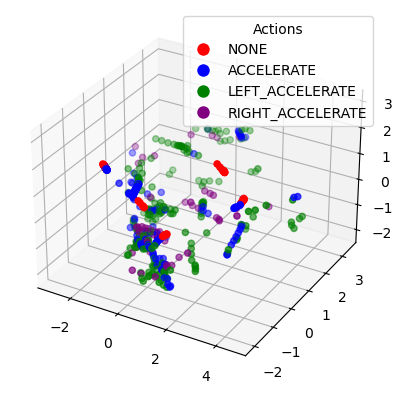

In [8]:
# Crear un diccionario de colores para cada categoría
color_dict = {'NONE': 'red', 'ACCELERATE': 'blue', 'LEFT_ACCELERATE': 'green', 'RIGHT_ACCELERATE': 'purple'}

# Mapear las categorías a colores utilizando map
colors = output['action'].map(color_dict)

# Crear un gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Colorear los puntos según las categorías
scatter = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=colors)

# Crear elementos de leyenda manualmente
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
                   for label, color in color_dict.items()]

# Añadir la leyenda al gráfico
ax.legend(handles=legend_elements, title='Actions', loc='upper right')

# Mostrar el gráfico
plt.show()

Observando esta representación, podemos darnos cuenta de que no nos da ningún tipo de información para este tipo de problemas, así que vamos a representar los datos según rayos y posiciones del coche

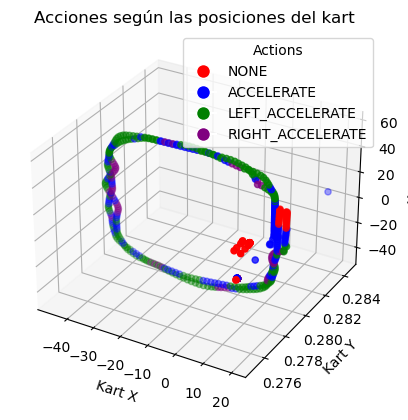

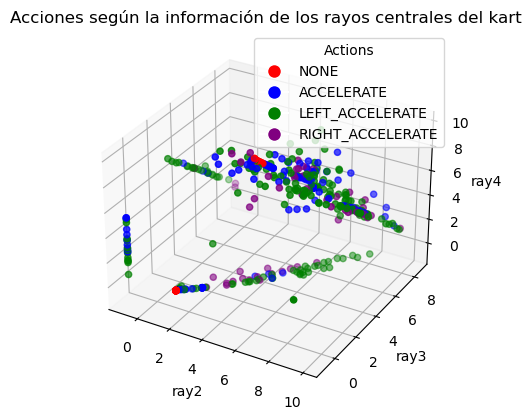

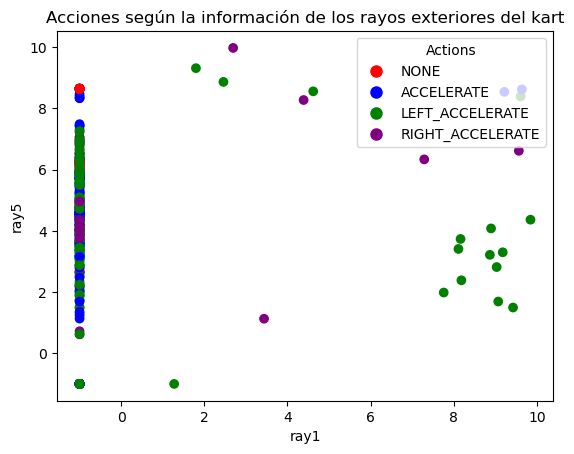

In [9]:
positions = stats[['kartx','karty', 'kartz']].values
central_rays = stats[['ray2','ray3','ray4']].values
outside_rays = stats[['ray1', 'ray5']].values

#Gráfico 1 
positions_fig = plt.figure()
positions_ax = positions_fig.add_subplot(111, projection='3d')
scatter = positions_ax.scatter(positions[:, 0], positions[:,1], positions[:, 2], c=colors)
positions_ax.legend(handles=legend_elements, title='Actions', loc='upper right')
positions_ax.set_xlabel('Kart X')
positions_ax.set_ylabel('Kart Y')
positions_ax.set_zlabel('Kart Z')
positions_ax.set_title('Acciones según las posiciones del kart')

#Gráfico 2
central_rays_fig = plt.figure()
central_rays_ax = central_rays_fig.add_subplot(111, projection='3d')
scatter = central_rays_ax.scatter(central_rays[:, 0], central_rays[:,1],central_rays[:, 2], c=colors)
central_rays_ax.legend(handles=legend_elements, title='Actions', loc='upper right')
central_rays_ax.set_xlabel('ray2')
central_rays_ax.set_ylabel('ray3')
central_rays_ax.set_zlabel('ray4')
central_rays_ax.set_title('Acciones según la información de los rayos centrales del kart')

#Gráfico 3
outside_rays_fig, outside_rays_ax = plt.subplots()
positions_scatter = outside_rays_ax.scatter(outside_rays[:, 0], outside_rays[:, 1], c=colors)
outside_rays_ax.legend(handles=legend_elements, title='Actions', loc='upper right')
outside_rays_ax.set_xlabel('ray1')
outside_rays_ax.set_ylabel('ray5')
outside_rays_ax.set_title('Acciones según la información de los rayos exteriores del kart')
# Mostrar los gráficos
plt.show()

## Ejercicio 3: Limpieza del dataset 

##### 1.Quitar entradas que no aportan al modelo

In [10]:
## Quito las columnas de tiempo (no lo necesito porque tengo las posiciones, no es relevante)
#Quito también la columna de posiciones y, porque la pista es plana y nunca cambia la posición en este eje
stats = stats.drop('karty', axis = 1)
stats = stats.drop('time', axis = 1)

##### 2.Sustituir valores anómalos

In [11]:
#sustituyo los valores negativos de los raycast por sus valores máximos para que no contaminen las funciones
max_ray1=stats['ray1'].max()
max_ray2=stats['ray2'].max()
max_ray3=stats['ray3'].max()
max_ray4=stats['ray4'].max()
max_ray5=stats['ray5'].max()

stats.loc[stats['ray1']<=-1,'ray1']=max_ray1
stats.loc[stats['ray2']<=-1,'ray2']=max_ray2
stats.loc[stats['ray3']<=-1,'ray3']=max_ray3
stats.loc[stats['ray4']<=-1,'ray4']=max_ray4
stats.loc[stats['ray5']<=-1,'ray5']=max_ray5

##### 3.Normalizar valores

In [12]:
#normalizar los datos de la entrada
normalize_data = stats.columns
values= stats[normalize_data]

# Inicializar el StandardScaler
scaler = StandardScaler()

# Ajustar el scaler y transformar las características
normalized_features = scaler.fit_transform(values)

# Reemplazar las características originales con las normalizadas en el DataFrame
stats[normalize_data] = normalized_features
display(stats[200:220])


,ray1,ray2,ray3,ray4,ray5,kartx,kartz
200,0.146571,0.634647,0.973795,-0.807492,-1.082680,0.509272,-1.518467
201,0.146571,0.472524,0.957394,0.002480,-1.041407,0.559096,-1.487706
202,0.146571,0.320506,0.884587,1.316956,-0.936313,0.603895,-1.459319
203,0.146571,0.229070,0.775406,1.316956,-0.832699,0.648348,-1.425720
204,0.146571,0.243985,0.694189,0.823902,-0.789901,0.685366,-1.388123
205,0.146571,0.316346,0.676046,0.035598,-0.796889,0.714254,-1.346748
206,0.146571,0.436191,0.704861,-0.447171,-0.832661,0.735476,-1.303759
207,0.146571,0.702381,0.805670,-0.987585,-0.922132,0.748065,-1.257366
208,0.146571,1.010904,0.978675,-1.369255,-1.064845,0.752020,-1.209452
209,0.146571,1.181933,1.140474,-1.563386,-1.224740,0.752195,-1.160036


##### 4.Aplicar one hot encoding para los datos de la salida

In [13]:
#One hot encoding de pandas para convertir las variables cualitativas de la salida
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output = False)
output_encoded = onehot_encoder.fit_transform(output)

output_encoded = pandas.DataFrame(output_encoded,columns=onehot_encoder.get_feature_names_out(['action']))
complete_stats = pandas.concat([stats,output_encoded] , axis = 1)

display(complete_stats[200:220])
display(output_encoded[200:220])

,ray1,ray2,ray3,ray4,ray5,kartx,kartz,action_ACCELERATE,action_LEFT_ACCELERATE,action_NONE,action_RIGHT_ACCELERATE
200,0.146571,0.634647,0.973795,-0.807492,-1.082680,0.509272,-1.518467,0.0,1.0,0.0,0.0
201,0.146571,0.472524,0.957394,0.002480,-1.041407,0.559096,-1.487706,0.0,1.0,0.0,0.0
202,0.146571,0.320506,0.884587,1.316956,-0.936313,0.603895,-1.459319,0.0,1.0,0.0,0.0
203,0.146571,0.229070,0.775406,1.316956,-0.832699,0.648348,-1.425720,0.0,1.0,0.0,0.0
204,0.146571,0.243985,0.694189,0.823902,-0.789901,0.685366,-1.388123,0.0,1.0,0.0,0.0
205,0.146571,0.316346,0.676046,0.035598,-0.796889,0.714254,-1.346748,0.0,1.0,0.0,0.0
206,0.146571,0.436191,0.704861,-0.447171,-0.832661,0.735476,-1.303759,0.0,1.0,0.0,0.0
207,0.146571,0.702381,0.805670,-0.987585,-0.922132,0.748065,-1.257366,0.0,1.0,0.0,0.0
208,0.146571,1.010904,0.978675,-1.369255,-1.064845,0.752020,-1.209452,0.0,1.0,0.0,0.0
209,0.146571,1.181933,1.140474,-1.563386,-1.224740,0.752195,-1.160036,0.0,0.0,0.0,1.0


,action_ACCELERATE,action_LEFT_ACCELERATE,action_NONE,action_RIGHT_ACCELERATE
200,0.0,1.0,0.0,0.0
201,0.0,1.0,0.0,0.0
202,0.0,1.0,0.0,0.0
203,0.0,1.0,0.0,0.0
204,0.0,1.0,0.0,0.0
205,0.0,1.0,0.0,0.0
206,0.0,1.0,0.0,0.0
207,0.0,1.0,0.0,0.0
208,0.0,1.0,0.0,0.0
209,0.0,0.0,0.0,1.0


##### Representación visual con los datos normalizados

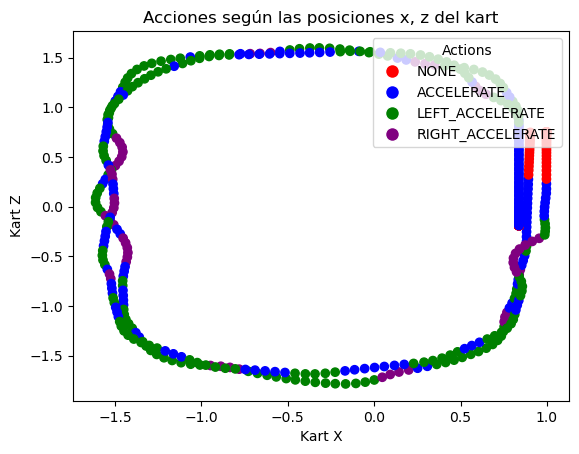

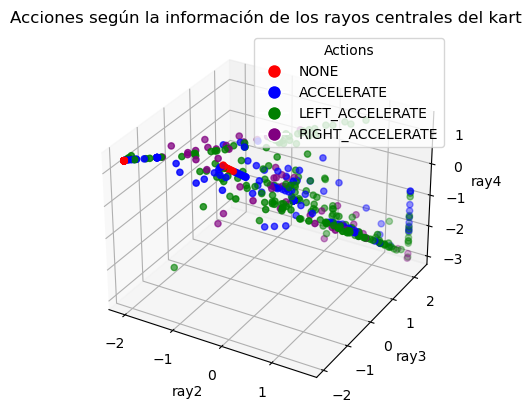

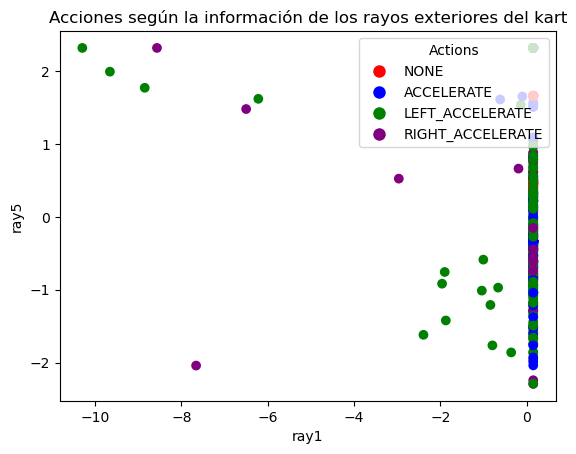

In [14]:
positions = stats[['kartx',  'kartz']].values
central_rays = stats[['ray2','ray3','ray4']].values
outside_rays = stats[['ray1', 'ray5']].values

#Gráfico 1 
positions_fig, positions_ax = plt.subplots()
scatter = positions_ax.scatter(positions[:, 0], positions[:, 1], c=colors)
positions_ax.legend(handles=legend_elements, title='Actions', loc='upper right')
positions_ax.set_xlabel('Kart X')
positions_ax.set_ylabel('Kart Z')
positions_ax.set_title('Acciones según las posiciones x, z del kart')

#Gráfico 2
central_rays_fig = plt.figure()
central_rays_ax = central_rays_fig.add_subplot(111, projection='3d')
scatter = central_rays_ax.scatter(central_rays[:, 0], central_rays[:,1],central_rays[:, 2], c=colors)
central_rays_ax.legend(handles=legend_elements, title='Actions', loc='upper right')
central_rays_ax.set_xlabel('ray2')
central_rays_ax.set_ylabel('ray3')
central_rays_ax.set_zlabel('ray4')
central_rays_ax.set_title('Acciones según la información de los rayos centrales del kart')

#Gráfico 3
outside_rays_fig, outside_rays_ax = plt.subplots()
positions_scatter = outside_rays_ax.scatter(outside_rays[:, 0], outside_rays[:, 1], c=colors)
outside_rays_ax.legend(handles=legend_elements, title='Actions', loc='upper right')
outside_rays_ax.set_xlabel('ray1')
outside_rays_ax.set_ylabel('ray5')
outside_rays_ax.set_title('Acciones según la información de los rayos exteriores del kart')
# Mostrar los gráficos
plt.show()

## Ejercicio 4: Pruebas con diferentes modelos de Machine Learning

División los conjuntos para entrenamiento y prueba

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
output_array = output['action'].ravel()
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(stats, output_array, test_size=0.2, random_state=42)

#Parametros iguales para los modelos
n_iters = 10000
my_alpha= 0.2
my_learningrate = 0.1

### 1.Mi perceptrón multicapa

In [17]:
import ann

In [18]:
y_entrenamiento_encoded = onehot_encoder.fit_transform(y_entrenamiento.reshape(-1, 1))
y_entrenamiento_encoded = y_entrenamiento_encoded

nNeuronas_capa = [7, 5, 4, len(y_entrenamiento_encoded[1])]

trained_thetas = ann.gradientdescent_generalizado(nNeuronas_capa, X_entrenamiento, y_entrenamiento_encoded, my_alpha, n_iters, my_learningrate)

z,a = ann.FeedForward_generalizado(trained_thetas, nNeuronas_capa, X_prueba)
y = y_prueba
maximo = ann.predict(a[-1])

In [19]:
# Ajustar y transformar y_entrenamiento
y_prueba_encoded = onehot_encoder.fit_transform(y_prueba.reshape(-1, 1))

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [21]:
#Datos de mi perceptrón
my_cm = confusion_matrix(np.argmax(y_prueba_encoded, axis=1),maximo)
my_acc = np.trace(my_cm)/my_cm.sum()
my_acc = round(my_acc * 100, 4)

mse = mean_squared_error(np.argmax(y_prueba_encoded, axis=1),maximo)
print(f"My accuracy: {my_acc}%")
print("My confussion Matrix\n",my_cm)
print("My MSE:", mse)

My accuracy: 56.0748%
My confussion Matrix
 [[11 24 13  0]
 [ 0 37  0  0]
 [ 0  0 12  0]
 [ 2  8  0  0]]
My MSE: 1.1775700934579438


### 2.MLP Classifier (SKLearn)

In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
# Modelo de perceptrón multicapa con sigmoid como funcin de activacion
mlp = MLPClassifier((5, 4), max_iter=n_iters, alpha = my_alpha, learning_rate_init = my_learningrate, activation = "logistic")

# Entrenar el modelo
mlp.fit(X_entrenamiento, y_entrenamiento)


MLPClassifier(activation='logistic', alpha=0.2, hidden_layer_sizes=(5, 4),
              learning_rate_init=0.1, max_iter=10000)

In [24]:
# Realizar predicciones
y_pred = mlp.predict(X_prueba)
# Evalúar el rendimiento
accuracy = accuracy_score(y_pred, y_prueba)

In [25]:
#ohe de las predicciones y salidas para hacer el MSE
y_pred_encoded = onehot_encoder.fit_transform(y_pred.reshape(-1, 1))
y_prueba_encoded = onehot_encoder.fit_transform(y_prueba.reshape(-1, 1))
while(y_pred_encoded.shape[1] < len(y_entrenamiento_encoded[1])):
     y_pred_encoded = np.hstack([np.ones((y_pred_encoded.shape[0], 1)), y_pred_encoded])

In [26]:
#Datos del MLP
cm_mlp = confusion_matrix(y_prueba,y_pred)
acc_mlp = np.trace(cm_mlp)/cm_mlp.sum()
acc_mlp = round(acc_mlp *100,4)

MSE_mlp = mean_squared_error(y_pred_encoded, y_prueba_encoded)
print(f"Accuracy MLP classifier: {acc_mlp}%")
print("Confussion Matrix MLP classifier\n",cm_mlp)
print("MSE MLPClassifier:", MSE_mlp)

Accuracy MLP classifier: 56.0748%
Confussion Matrix MLP classifier
 [[18 24  6  0]
 [ 2 35  0  0]
 [ 5  0  7  0]
 [ 2  8  0  0]]
MSE MLPClassifier: 0.5163551401869159


In [27]:
#Comparacion de mi modelo con el de MLP
dif = round(abs(acc_mlp - my_acc), 4)
print(f"La diferencia entre la accuracy de los dos modelos es de {dif}%")

if(dif<5.0):
    print("\nLos modelos son similares")
else:
    print("Los modelos son muy diferentes")

La diferencia entre la accuracy de los dos modelos es de 0.0%

Los modelos son similares


### 3.KNeighboursClassifier (SKLearn)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_entrenamiento, y_entrenamiento)
y_pred = knn.predict(X_prueba)

#ohe de las predicciones y salidas para hacer el MSE
y_pred_encoded = onehot_encoder.fit_transform(y_pred.reshape(-1, 1))
while(y_pred_encoded.shape[1] < len(y_entrenamiento_encoded[1])):
     y_pred_encoded = np.hstack([np.ones((y_pred_encoded.shape[0], 1)), y_pred_encoded])
        
# Calcular la precisión
acc_knn = accuracy_score(y_prueba, y_pred)
acc_knn = round(acc_knn*100,4)

#Datos del MLP
cm_knn = confusion_matrix(y_prueba,y_pred)
MSE_knn = mean_squared_error(y_pred_encoded, y_prueba_encoded)
print(f"Accuracy KNeighborsClassifier: {acc_knn}%")
print("Confussion KNeighborsClassifier\n",cm_knn)
print("MSE KNeighbors Classifier:", MSE_knn)

Accuracy KNeighborsClassifier: 68.2243%
Confussion KNeighborsClassifier
 [[26 11  6  5]
 [ 4 30  0  3]
 [ 1  0 11  0]
 [ 1  3  0  6]]
MSE KNeighbors Classifier: 0.1588785046728972


### 4.DecisionTreeClassifier (sklearn)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_entrenamiento, y_entrenamiento)
y_pred = dtc.predict(X_prueba)

#ohe de las predicciones y salidas para hacer el MSE
y_pred_encoded = onehot_encoder.fit_transform(y_pred.reshape(-1, 1))
while(y_pred_encoded.shape[1] < len(y_entrenamiento_encoded[1])):
     y_pred_encoded = np.hstack([np.ones((y_pred_encoded.shape[0], 1)), y_pred_encoded])
        
# Calcular la precisión
acc_dtc = accuracy_score(y_prueba, y_pred)
acc_dtc = round(acc_dtc*100,4)

#Datos del MLP
cm_dtc = confusion_matrix(y_prueba,y_pred)
mse_dtc = mean_squared_error(y_pred_encoded, y_prueba_encoded)

print(f"Accuracy Decision Tree Classifier: {acc_dtc}%")
print("Confussion Decision Tree Classifier\n",cm_dtc)
print("MSE Decision Tree Classifier:", mse_dtc)

Accuracy Decision Tree Classifier: 71.9626%
Confussion Decision Tree Classifier
 [[29 12  4  3]
 [ 3 31  0  3]
 [ 1  0 11  0]
 [ 1  3  0  6]]
MSE Decision Tree Classifier: 0.14018691588785046


### 5.Support Vector Classifier (SVC(sklearn))

In [32]:
from sklearn.svm import SVC

In [45]:
svc = SVC()
svc.fit(X_entrenamiento, y_entrenamiento)
y_pred = svc.predict(X_prueba)

#ohe de las predicciones y salidas para hacer el MSE
y_pred_encoded = onehot_encoder.fit_transform(y_pred.reshape(-1, 1))
while(y_pred_encoded.shape[1] < len(y_entrenamiento_encoded[1])):
     y_pred_encoded = np.hstack([np.ones((y_pred_encoded.shape[0], 1)), y_pred_encoded])
        
# Calcular la precisión
acc_svc = accuracy_score(y_prueba, y_pred)
acc_svc = round(acc_svc*100,4)

#Datos del MLP
cm_svc = confusion_matrix(y_prueba,y_pred)
mse_svc = mean_squared_error(y_pred_encoded, y_prueba_encoded)

print(f"Accuracy Support Vector Classifier : {acc_svc}%")
print("Confussion matrix Support Vector Classifier \n",cm_svc)
print("MSE Support Vector Classifier :", mse_svc)

Accuracy Support Vector Classifier : 61.6822%
Confussion matrix Support Vector Classifier 
 [[23 19  4  2]
 [ 2 35  0  0]
 [ 5  0  7  0]
 [ 2  7  0  1]]
MSE Support Vector Classifier : 0.19158878504672897


### 6.Modelo secuencial (Keras)

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.losses import SparseCategoricalCrossentropy

In [35]:
# Crear un modelo secuencial
sq = Sequential()

#Primera capa oculta con 32 nodos y función de activación ReLU
sq.add(Dense(32, activation='relu', input_dim=7))
#Segunda capa oculta con 16 nodos y función de activación ReLU
sq.add(Dense(16, activation='relu'))
sq.add(Dense(len(y_entrenamiento_encoded[1]), activation='softmax'))  # Asume que hay 4 clases
sq.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

y_train_one_hot = onehot_encoder.fit_transform(y_entrenamiento.reshape(-1, 1))

# Ajuste del modelo a los datos de entrenamiento
history_sq =sq.fit(X_entrenamiento, y_train_one_hot, epochs=1000)



Epoch 1/1000


14/14 [==============================] - 0s 1ms/step - loss: 1.3522 - accuracy: 0.3278
Epoch 2/1000
14/14 [==============================] - 0s 732us/step - loss: 1.2692 - accuracy: 0.4363
Epoch 3/1000
14/14 [==============================] - 0s 629us/step - loss: 1.2165 - accuracy: 0.4316
Epoch 4/1000
14/14 [==============================] - 0s 655us/step - loss: 1.1722 - accuracy: 0.4434
Epoch 5/1000
14/14 [==============================] - 0s 736us/step - loss: 1.1361 - accuracy: 0.4811
Epoch 6/1000
14/14 [==============================] - 0s 693us/step - loss: 1.1022 - accuracy: 0.5425
Epoch 7/1000
14/14 [==============================] - 0s 616us/step - loss: 1.0703 - accuracy: 0.5731
Epoch 8/1000
14/14 [==============================] - 0s 651us/step - loss: 1.0431 - accuracy: 0.6061
Epoch 9/1000
14/14 [==============================] - 0s 694us/step - loss: 1.0208 - accuracy: 0.6061
Epoch 10/1000
14/14 [==============================] - 0s 654us/step - loss: 1.0

14/14 [==============================] - 0s 615us/step - loss: 0.6191 - accuracy: 0.7241
Epoch 73/1000
14/14 [==============================] - 0s 660us/step - loss: 0.6171 - accuracy: 0.7146
Epoch 74/1000
14/14 [==============================] - 0s 622us/step - loss: 0.6145 - accuracy: 0.7075
Epoch 75/1000
14/14 [==============================] - 0s 615us/step - loss: 0.6125 - accuracy: 0.7382
Epoch 76/1000
14/14 [==============================] - 0s 615us/step - loss: 0.6111 - accuracy: 0.7476
Epoch 77/1000
14/14 [==============================] - 0s 538us/step - loss: 0.6089 - accuracy: 0.7406
Epoch 78/1000
14/14 [==============================] - 0s 615us/step - loss: 0.6079 - accuracy: 0.7382
Epoch 79/1000
14/14 [==============================] - 0s 658us/step - loss: 0.6075 - accuracy: 0.7382
Epoch 80/1000
14/14 [==============================] - 0s 539us/step - loss: 0.6042 - accuracy: 0.7099
Epoch 81/1000
14/14 [==============================] - 0s 770us/step - loss: 0.6016 - a

14/14 [==============================] - 0s 538us/step - loss: 0.5193 - accuracy: 0.7524
Epoch 152/1000
14/14 [==============================] - 0s 615us/step - loss: 0.5197 - accuracy: 0.7476
Epoch 153/1000
14/14 [==============================] - 0s 539us/step - loss: 0.5176 - accuracy: 0.7476
Epoch 154/1000
14/14 [==============================] - 0s 578us/step - loss: 0.5167 - accuracy: 0.7594
Epoch 155/1000
14/14 [==============================] - 0s 655us/step - loss: 0.5163 - accuracy: 0.7524
Epoch 156/1000
14/14 [==============================] - 0s 613us/step - loss: 0.5146 - accuracy: 0.7500
Epoch 157/1000
14/14 [==============================] - 0s 605us/step - loss: 0.5164 - accuracy: 0.7382
Epoch 158/1000
14/14 [==============================] - 0s 578us/step - loss: 0.5135 - accuracy: 0.7594
Epoch 159/1000
14/14 [==============================] - 0s 632us/step - loss: 0.5128 - accuracy: 0.7500
Epoch 160/1000
14/14 [==============================] - 0s 631us/step - loss: 0

14/14 [==============================] - 0s 655us/step - loss: 0.4636 - accuracy: 0.7783
Epoch 230/1000
14/14 [==============================] - 0s 696us/step - loss: 0.4622 - accuracy: 0.7712
Epoch 231/1000
14/14 [==============================] - 0s 732us/step - loss: 0.4603 - accuracy: 0.7948
Epoch 232/1000
14/14 [==============================] - 0s 727us/step - loss: 0.4604 - accuracy: 0.7925
Epoch 233/1000
14/14 [==============================] - 0s 666us/step - loss: 0.4625 - accuracy: 0.7854
Epoch 234/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4599 - accuracy: 0.7736
Epoch 235/1000
14/14 [==============================] - 0s 732us/step - loss: 0.4598 - accuracy: 0.7901
Epoch 236/1000
14/14 [==============================] - 0s 655us/step - loss: 0.4571 - accuracy: 0.7901
Epoch 237/1000
14/14 [==============================] - 0s 575us/step - loss: 0.4574 - accuracy: 0.7925
Epoch 238/1000
14/14 [==============================] - 0s 655us/step - loss: 0.4

Epoch 308/1000
14/14 [==============================] - 0s 654us/step - loss: 0.4241 - accuracy: 0.8042
Epoch 309/1000
14/14 [==============================] - 0s 550us/step - loss: 0.4225 - accuracy: 0.7995
Epoch 310/1000
14/14 [==============================] - 0s 641us/step - loss: 0.4243 - accuracy: 0.8160
Epoch 311/1000
14/14 [==============================] - 0s 660us/step - loss: 0.4216 - accuracy: 0.8019
Epoch 312/1000
14/14 [==============================] - 0s 616us/step - loss: 0.4241 - accuracy: 0.8066
Epoch 313/1000
14/14 [==============================] - 0s 617us/step - loss: 0.4225 - accuracy: 0.8208
Epoch 314/1000
14/14 [==============================] - 0s 653us/step - loss: 0.4206 - accuracy: 0.8042
Epoch 315/1000
14/14 [==============================] - 0s 617us/step - loss: 0.4202 - accuracy: 0.8019
Epoch 316/1000
14/14 [==============================] - 0s 654us/step - loss: 0.4207 - accuracy: 0.8090
Epoch 317/1000
14/14 [==============================] - 0s 617us

14/14 [==============================] - 0s 555us/step - loss: 0.3922 - accuracy: 0.8278
Epoch 387/1000
14/14 [==============================] - 0s 617us/step - loss: 0.3915 - accuracy: 0.8302
Epoch 388/1000
14/14 [==============================] - 0s 654us/step - loss: 0.3934 - accuracy: 0.8137
Epoch 389/1000
14/14 [==============================] - 0s 558us/step - loss: 0.3912 - accuracy: 0.8255
Epoch 390/1000
14/14 [==============================] - 0s 635us/step - loss: 0.3891 - accuracy: 0.8137
Epoch 391/1000
14/14 [==============================] - 0s 577us/step - loss: 0.3915 - accuracy: 0.8113
Epoch 392/1000
14/14 [==============================] - 0s 578us/step - loss: 0.3902 - accuracy: 0.8278
Epoch 393/1000
14/14 [==============================] - 0s 602us/step - loss: 0.3911 - accuracy: 0.8184
Epoch 394/1000
14/14 [==============================] - 0s 654us/step - loss: 0.3897 - accuracy: 0.8208
Epoch 395/1000
14/14 [==============================] - 0s 578us/step - loss: 0

Epoch 465/1000
14/14 [==============================] - 0s 578us/step - loss: 0.3674 - accuracy: 0.8325
Epoch 466/1000
14/14 [==============================] - 0s 585us/step - loss: 0.3647 - accuracy: 0.8491
Epoch 467/1000
14/14 [==============================] - 0s 607us/step - loss: 0.3688 - accuracy: 0.8467
Epoch 468/1000
14/14 [==============================] - 0s 619us/step - loss: 0.3662 - accuracy: 0.8443
Epoch 469/1000
14/14 [==============================] - 0s 559us/step - loss: 0.3671 - accuracy: 0.8491
Epoch 470/1000
14/14 [==============================] - 0s 604us/step - loss: 0.3660 - accuracy: 0.8349
Epoch 471/1000
14/14 [==============================] - 0s 538us/step - loss: 0.3629 - accuracy: 0.8491
Epoch 472/1000
14/14 [==============================] - 0s 616us/step - loss: 0.3674 - accuracy: 0.8349
Epoch 473/1000
14/14 [==============================] - 0s 538us/step - loss: 0.3644 - accuracy: 0.8467
Epoch 474/1000
14/14 [==============================] - 0s 538us

14/14 [==============================] - 0s 616us/step - loss: 0.3468 - accuracy: 0.8467
Epoch 544/1000
14/14 [==============================] - 0s 655us/step - loss: 0.3459 - accuracy: 0.8538
Epoch 545/1000
14/14 [==============================] - 0s 577us/step - loss: 0.3475 - accuracy: 0.8491
Epoch 546/1000
14/14 [==============================] - 0s 609us/step - loss: 0.3414 - accuracy: 0.8585
Epoch 547/1000
14/14 [==============================] - 0s 636us/step - loss: 0.3472 - accuracy: 0.8467
Epoch 548/1000
14/14 [==============================] - 0s 557us/step - loss: 0.3489 - accuracy: 0.8514
Epoch 549/1000
14/14 [==============================] - 0s 655us/step - loss: 0.3442 - accuracy: 0.8443
Epoch 550/1000
14/14 [==============================] - 0s 570us/step - loss: 0.3464 - accuracy: 0.8514
Epoch 551/1000
14/14 [==============================] - 0s 656us/step - loss: 0.3468 - accuracy: 0.8467
Epoch 552/1000
14/14 [==============================] - 0s 637us/step - loss: 0

14/14 [==============================] - 0s 550us/step - loss: 0.3318 - accuracy: 0.8561
Epoch 622/1000
14/14 [==============================] - 0s 539us/step - loss: 0.3302 - accuracy: 0.8420
Epoch 623/1000
14/14 [==============================] - 0s 565us/step - loss: 0.3286 - accuracy: 0.8491
Epoch 624/1000
14/14 [==============================] - 0s 616us/step - loss: 0.3291 - accuracy: 0.8679
Epoch 625/1000
14/14 [==============================] - 0s 546us/step - loss: 0.3288 - accuracy: 0.8561
Epoch 626/1000
14/14 [==============================] - 0s 570us/step - loss: 0.3281 - accuracy: 0.8514
Epoch 627/1000
14/14 [==============================] - 0s 654us/step - loss: 0.3309 - accuracy: 0.8632
Epoch 628/1000
14/14 [==============================] - 0s 654us/step - loss: 0.3273 - accuracy: 0.8561
Epoch 629/1000
14/14 [==============================] - 0s 536us/step - loss: 0.3268 - accuracy: 0.8656
Epoch 630/1000
14/14 [==============================] - 0s 578us/step - loss: 0

Epoch 700/1000
14/14 [==============================] - 0s 655us/step - loss: 0.3153 - accuracy: 0.8656
Epoch 701/1000
14/14 [==============================] - 0s 577us/step - loss: 0.3099 - accuracy: 0.8679
Epoch 702/1000
14/14 [==============================] - 0s 615us/step - loss: 0.3113 - accuracy: 0.8726
Epoch 703/1000
14/14 [==============================] - 0s 615us/step - loss: 0.3129 - accuracy: 0.8679
Epoch 704/1000
14/14 [==============================] - 0s 623us/step - loss: 0.3126 - accuracy: 0.8608
Epoch 705/1000
14/14 [==============================] - 0s 578us/step - loss: 0.3112 - accuracy: 0.8656
Epoch 706/1000
14/14 [==============================] - 0s 655us/step - loss: 0.3105 - accuracy: 0.8632
Epoch 707/1000
14/14 [==============================] - 0s 694us/step - loss: 0.3123 - accuracy: 0.8679
Epoch 708/1000
14/14 [==============================] - 0s 702us/step - loss: 0.3106 - accuracy: 0.8703
Epoch 709/1000
14/14 [==============================] - 0s 661us

14/14 [==============================] - 0s 654us/step - loss: 0.2946 - accuracy: 0.8774
Epoch 779/1000
14/14 [==============================] - 0s 654us/step - loss: 0.2935 - accuracy: 0.8821
Epoch 780/1000
14/14 [==============================] - 0s 538us/step - loss: 0.2960 - accuracy: 0.8868
Epoch 781/1000
14/14 [==============================] - 0s 616us/step - loss: 0.2910 - accuracy: 0.8844
Epoch 782/1000
14/14 [==============================] - 0s 634us/step - loss: 0.2947 - accuracy: 0.8821
Epoch 783/1000
14/14 [==============================] - 0s 641us/step - loss: 0.2963 - accuracy: 0.8750
Epoch 784/1000
14/14 [==============================] - 0s 654us/step - loss: 0.2956 - accuracy: 0.8726
Epoch 785/1000
14/14 [==============================] - 0s 545us/step - loss: 0.2945 - accuracy: 0.8797
Epoch 786/1000
14/14 [==============================] - 0s 541us/step - loss: 0.2952 - accuracy: 0.8821
Epoch 787/1000
14/14 [==============================] - 0s 578us/step - loss: 0

14/14 [==============================] - 0s 577us/step - loss: 0.2833 - accuracy: 0.8844
Epoch 857/1000
14/14 [==============================] - 0s 538us/step - loss: 0.2813 - accuracy: 0.8892
Epoch 858/1000
14/14 [==============================] - 0s 615us/step - loss: 0.2808 - accuracy: 0.8868
Epoch 859/1000
14/14 [==============================] - 0s 626us/step - loss: 0.2802 - accuracy: 0.8915
Epoch 860/1000
14/14 [==============================] - 0s 624us/step - loss: 0.2819 - accuracy: 0.8774
Epoch 861/1000
14/14 [==============================] - 0s 616us/step - loss: 0.2766 - accuracy: 0.8892
Epoch 862/1000
14/14 [==============================] - 0s 591us/step - loss: 0.2801 - accuracy: 0.8774
Epoch 863/1000
14/14 [==============================] - 0s 541us/step - loss: 0.2802 - accuracy: 0.8892
Epoch 864/1000
14/14 [==============================] - 0s 617us/step - loss: 0.2780 - accuracy: 0.8797
Epoch 865/1000
14/14 [==============================] - 0s 685us/step - loss: 0

Epoch 935/1000
14/14 [==============================] - 0s 606us/step - loss: 0.2643 - accuracy: 0.8868
Epoch 936/1000
14/14 [==============================] - 0s 617us/step - loss: 0.2642 - accuracy: 0.8868
Epoch 937/1000
14/14 [==============================] - 0s 607us/step - loss: 0.2652 - accuracy: 0.8844
Epoch 938/1000
14/14 [==============================] - 0s 541us/step - loss: 0.2679 - accuracy: 0.8939
Epoch 939/1000
14/14 [==============================] - 0s 617us/step - loss: 0.2636 - accuracy: 0.8868
Epoch 940/1000
14/14 [==============================] - 0s 578us/step - loss: 0.2653 - accuracy: 0.8797
Epoch 941/1000
14/14 [==============================] - 0s 538us/step - loss: 0.2660 - accuracy: 0.8844
Epoch 942/1000
14/14 [==============================] - 0s 655us/step - loss: 0.2655 - accuracy: 0.8986
Epoch 943/1000
14/14 [==============================] - 0s 545us/step - loss: 0.2653 - accuracy: 0.8868
Epoch 944/1000
14/14 [==============================] - 0s 654us

In [36]:
acc_sq = history_sq.history['accuracy'][-1]
acc_sq = round(acc_sq * 100,4)
print(f"Accuracy Sequencial classifier from keras: {acc_sq}%")

Accuracy Sequencial classifier from keras: 88.2075%


### Búsqueda de la mejor precisión en MLPClasiffier

###### Búsqueda del mejor learning rate, función de activación y alpha combinados para encontrar la combinación con mejor accuracy para mis datos

In [37]:
activation_functions = ['logistic','identity','tanh','relu']
function = ''
best_function=''
init_LR= 0.05
init_alpha = 0.05
max_LR = 0.5
max_Alpha = 0.5
final_LR= 0
final_alpha = 0
best_accuracy = 0.0

for i in  range (len(activation_functions)) :
    function = activation_functions[i]
    while init_LR < max_LR :
        while init_alpha < max_Alpha :
            model = MLPClassifier((5, 4), max_iter = 10000, alpha = init_alpha, learning_rate_init = init_LR, activation = function)
            model.fit(X_entrenamiento, y_entrenamiento)
            y_pred = model.predict(X_prueba)
            accuracy = accuracy_score(y_pred, y_prueba)
            if(accuracy >= best_accuracy):
                best_accuracy = accuracy
                final_LR = init_LR
                final_alpha = init_alpha
                best_function = function
            init_alpha+= 0.05
        init_alpha = 0.05
        init_LR += 0.05
    init_LR= 0.05
print(f"Best learning rate:{round(final_LR,2)}, best alpha: {round(final_alpha,2)}, best function: {function}")
print(f"Accuracy with best parameters = {round(best_accuracy*100,4)}%")


Best learning rate:0.05, best alpha: 0.35, best function: relu
Accuracy with best parameters = 66.3551%


El modelo que mejor se adapta al juego es el clasificador secuencial de keras, ya que es el que mejor porcentaje de accuracy devuelve(80%), pero este es muy complejo y no devuelve información demasiado clara.
Se puede obvservar también que en este tipo de problemas de clasificación el Mean Square Error no aporta ningún tipo de información sobre qué modelo es el mejor, y por tanto se puede descartar su cálculo
Si el dataset está bien limpiado no da ningun problema. Aunque se puede observar que realmente no hay mucha diferencia de precisión con el perceptrón multicapa que hemos programado y el MLP Classifier con las modificaciones de búsqueda de mejor alpha y mejor learning rate. Vamos a utlilizar MLP con alpha y learning rate modificado, ya que es el más sencillo de exportar

### Exportacion del modelo final MLPClassifier para Unity

In [38]:
import Utils

In [39]:
model = MLPClassifier((7,5, 4), max_iter=n_iters, alpha = final_alpha, learning_rate_init = final_LR, activation = function)
model.fit(X_entrenamiento, y_entrenamiento)

MLPClassifier(alpha=0.35, hidden_layer_sizes=(7, 5, 4), learning_rate_init=0.05,
              max_iter=10000)

In [40]:
Utils.export_to_custom_format(model, "trainedModels/trained.txt")

### Exportación del modelo final KNeighbours para Unity

Para la parte opcional vamos a utilizar el modelo "Decision Tree Classifier" que es un modelo sencillo de utilizar y, además tiene una precisión bastante alta comparada con las demás que nos dan las distintas redes (exceptuando el modelo de keras, pero este modelo es demasiado complejo)

In [41]:
Utils.export_decision_tree_to_json(dtc,"trainedModels/decisionTree.json")